[link text](https://)**Analyzing U.S. COVID-19 Data**

**Imports:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from plotly.subplots import make_subplots
from sklearn.preprocessing import Normalizer
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials

**Loading the data:**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1_path = '/content/drive/Shareddrives/team6/data.csv'

df1 = pd.read_csv(data1_path)


<ipython-input-160-c267239a5a68>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(data1_path)


In [ ]:
df1.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [ ]:
data2_path = '/content/drive/Shareddrives/team6/pulse_puf_most_recent.csv'
df2 = pd.read_csv(data2_path)

In [ ]:
df2.head(100)

,scram,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,V010010002S75120637220112,1,12,NaN,5163.729932,1936,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,V010010002S79120143740111,1,12,NaN,13012.824476,1953,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,V010010002S90121760060111,1,12,NaN,5800.350164,1981,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,V010010003S37130143110111,1,13,NaN,5229.711692,1946,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.shape[1]

215

**PART 2: Answering Questions:**

 **2.1 Use the appropriate statistics and plots to answer the following
questions:**

 **1. Are hospitalized patients with underlying medical conditions and/or risk
behaviors more likely to die from COVID-19?** *Patients with underlying medical condition are more likey to die from COVID-19*

In [ ]:
# Extracting Columns  (death_yn, underlying_conditions_yn, hosp_yn)

# Function of "usecols" to reduce cost of memory
patient_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=[ "death_yn", "underlying_conditions_yn","hosp_yn"])

In [ ]:
# Printing Unique Values in each column to drop Missing and Unknown Values.
print("Unique Values that exists in death_yn Column :",patient_df.death_yn.unique())
print("Unique Values that exists in underlying_conditions_yn Column:",patient_df.underlying_conditions_yn.unique())
print("Unique Values that exists in hosp_yn Column:",patient_df.hosp_yn.unique())


Unique Values that exists in death_yn Column : ['No' 'Unknown' 'Missing' 'Yes' nan]
Unique Values that exists in underlying_conditions_yn Column: [nan 'Yes' 'No']
Unique Values that exists in hosp_yn Column: ['Missing' 'No' 'Yes' 'Unknown']


In [ ]:
# Drop Null Values that exist in patient dataframe
patient_df=patient_df.dropna()

In [ ]:
death_counts = patient_df['death_yn'].value_counts(normalize=True).reset_index()
print(death_counts)

  death_yn  proportion
0       No    0.589086
1  Missing    0.262056
2  Unknown    0.127689
3      Yes    0.021170


In [ ]:
#Make a copy to select died patients:

dead_df=patient_df[patient_df['death_yn']=='Yes']

In [ ]:
dead_df.head()

,hosp_yn,death_yn,underlying_conditions_yn
6517,Yes,Yes,Yes
7352,Yes,Yes,Yes
7488,Yes,Yes,Yes
7497,Yes,Yes,Yes
7540,Yes,Yes,Yes


In [ ]:
#select hospitilzed patiens
dead_df=dead_df[dead_df['hosp_yn']=='Yes']

In [ ]:
dead_df.head()

,hosp_yn,death_yn,underlying_conditions_yn
6517,Yes,Yes,Yes
7352,Yes,Yes,Yes
7488,Yes,Yes,Yes
7497,Yes,Yes,Yes
7540,Yes,Yes,Yes


In [ ]:
underlying_conditions_counts = dead_df['underlying_conditions_yn'].value_counts(normalize=True).sort_index()
print(underlying_conditions_counts)

underlying_conditions_yn
No     0.000793
Yes    0.999207
Name: proportion, dtype: float64


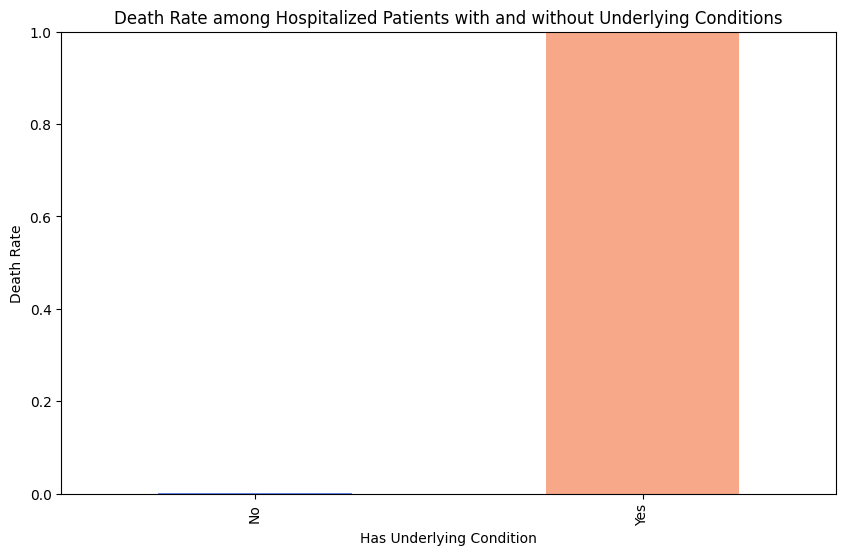

In [ ]:
# Count occurrences of  group
underlying_conditions_counts = dead_df['underlying_conditions_yn'].value_counts(normalize=True).sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#f7a889']
underlying_conditions_counts.plot(kind='bar', color=colors)

# Set the order of underlying condition values
underlying_condition_order = ['No', 'Yes']

# Adding labels and title
plt.xlabel('Has Underlying Condition')
plt.ylabel('Death Rate')
plt.title('Death Rate among Hospitalized Patients with and without Underlying Conditions')
plt.ylim(0,1)

# Show the plot
plt.show()

 **2. Who are the people (the demographic segment) that appear to be most at
risk of death due to COVID-19? Who is the least at risk?**

*Answer*:
*For most risk People*:
1.   Age group: +65 years
2.   Sex: Male
3.   Race: White
*For least at risk*:
1.   Age group: 0-17 years
2.   Sex: Female
3.   Race: Multiple/other


In [ ]:
# Extracting DemographicFeatures (sex, race, age_group)

# Function of "usecols" to reduce cost of memory
DemographicFeatures_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=["age_group", "sex", "race","death_yn"])

In [ ]:
# Drop Null Values that exist in DemographicFeatures dataframe
DemographicFeatures_df=DemographicFeatures_df.dropna()

In [ ]:
# Make sure that DemographicFeatures dataframe consists of 4 colums (sex, race, age_group and death_yn)
DemographicFeatures_df.shape[1]

4

In [ ]:
# Printing Unique Values in each column to drop Missing and Unknown Values.
print("Unique Values that exists in age_group Column :",DemographicFeatures_df.age_group.unique())
print("Unique Values that exists in sex Column:",DemographicFeatures_df.sex.unique())
print("Unique Values that exists in race Column:",DemographicFeatures_df.race.unique())
print("Unique Values that exists in death_yn Column:",DemographicFeatures_df.death_yn.unique())

Unique Values that exists in age_group Column : ['18 to 49 years' '65+ years' '0 - 17 years' '50 to 64 years' 'Missing']
Unique Values that exists in sex Column: ['Female' 'Male' 'Unknown' 'Missing' 'Other']
Unique Values that exists in race Column: ['Unknown' 'White' 'Missing' 'Black' 'Multiple/Other' 'Asian'
 'American Indian/Alaska Native' 'Native Hawaiian/Other Pacific Islander']
Unique Values that exists in death_yn Column: ['No' 'Unknown' 'Missing' 'Yes']


In [ ]:
# Extract age group from DemographicFeatures dataframe

# make a copy form DemographicFeatures_df
age_group=DemographicFeatures_df
# Filter death column --> 'Yes'
# Drop Missing Values that exist in age group column
age_group = age_group.drop(age_group[(age_group['age_group']=='Missing')].index)

age_group=age_group[['age_group', 'death_yn']].where(age_group.death_yn == "Yes")

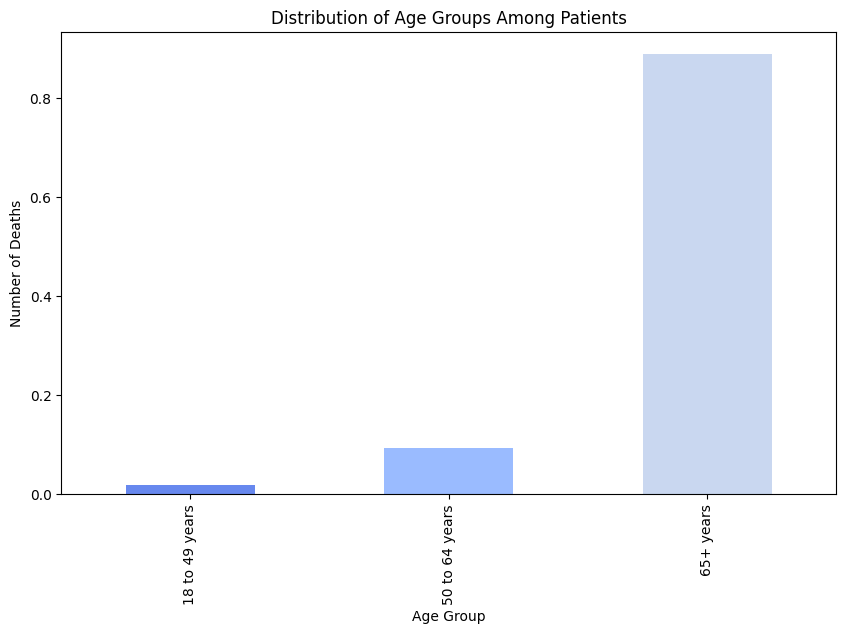

In [ ]:
# Count occurrences of each age group
age_group_counts = age_group['age_group'].value_counts(normalize=True).sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']
age_group_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Age Groups Among Patients')

# Show the plot
plt.show()

In [ ]:
# Extract sex from DemographicFeatures dataframe

# make a copy form DemographicFeatures_df
sex=DemographicFeatures_df
# Filter death column --> 'Yes'
# Drop Missing and Unknown Values that exist in sex column
sex = sex.drop(sex[(sex['sex']=='Unknown') |(sex['sex']=='Missing')].index)

sex=sex[['sex', 'death_yn']].where(sex.death_yn == "Yes")
sex.value_counts().to_frame('counts')

,,counts
sex,death_yn,
Male,Yes,44125
Female,Yes,35820


<Figure size 1000x600 with 0 Axes>

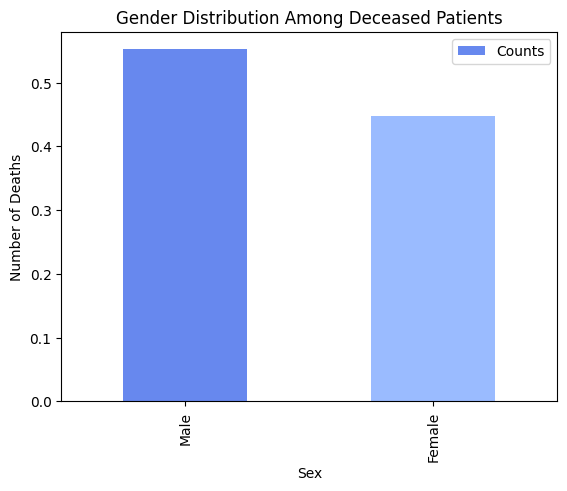

In [ ]:

# Count occurrences of each sex
sex_distribution = sex['sex'].value_counts(normalize=True).to_frame('counts').reset_index()

# Rename the index column to 'Sex'
sex_distribution.columns = ['Sex', 'Counts']

# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']

sex_distribution.plot(kind='bar', x='Sex', y='Counts', color=colors)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Number of Deaths')
plt.title('Gender Distribution Among Deceased Patients')

# Show the plot
plt.show()


In [ ]:
# Extract race from DemographicFeatures dataframe

# make a copy form DemographicFeatures_df
race=DemographicFeatures_df
# Filter death column --> 'Yes'
# Drop Unknown and Missing Values that exist in sex column
race = race.drop(race[(race['race']=='Unknown') |(race['race']=='Missing')].index)

race=race[['race', 'death_yn']].where(race.death_yn == "Yes")

# Calculate the value counts and convert them to a DataFrame
race_counts = race['race'].value_counts(normalize=True).reset_index()
race_counts.columns = ['race', 'counts']



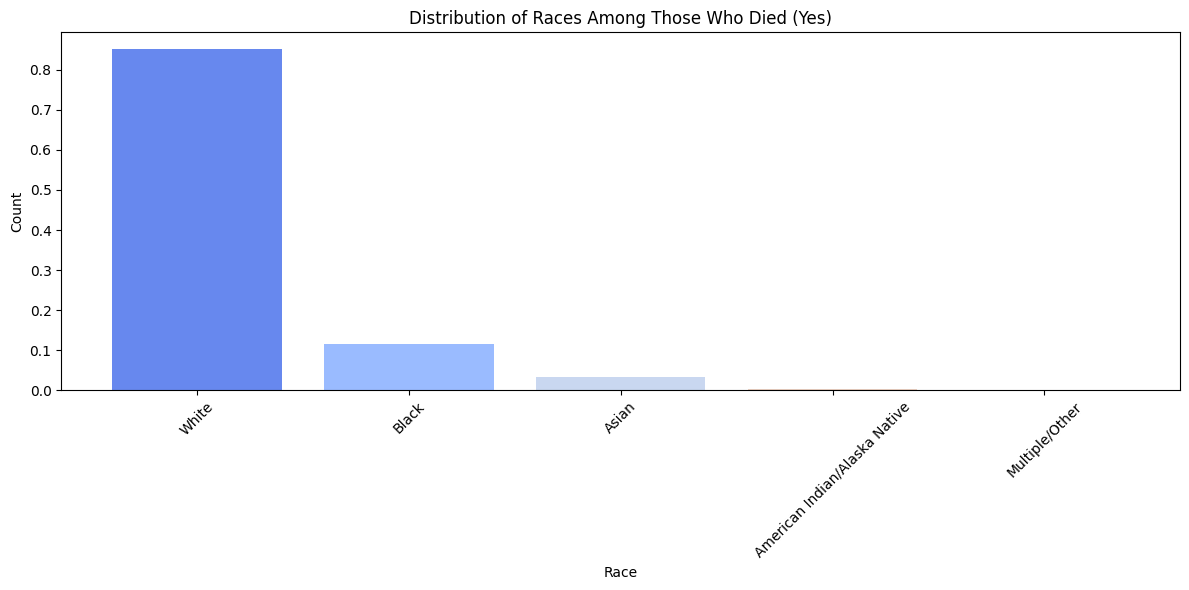

In [ ]:

# Plotting the bar chart
plt.figure(figsize=(12, 6))
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']
plt.bar(race_counts['race'], race_counts['counts'], color=colors)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races Among Those Who Died (Yes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping of labels

plt.show()


 **3. What percent of patients who have reported exposure to any kind of travel /
or congregation within the 14 days prior to illness onset end up hospitalized?
What percent of those go on to be hospitalized?**    *Answer:5.3%*

In [ ]:
#Load 2 columns from CSV file which are exposure_yn and hosp_yn
exposure_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=["exposure_yn", "hosp_yn"])

In [ ]:
# Explore Portion of dataset
print(exposure_df.shape[0])
exposure_df.exposure_yn.unique()
exposure_df.head()

19020962


,exposure_yn,hosp_yn
0,Missing,Missing
1,Missing,Missing
2,Missing,No
3,Missing,Missing
4,Missing,No


In [ ]:
# Filter dataset to select Only Yes responses of exposure_yn Column and Yes and No of hosp_yn Column

hospitilazed=exposure_df[(exposure_df['exposure_yn'] =='Yes') &(exposure_df['hosp_yn'] =='Yes')]

not_hospitilazed=exposure_df[(exposure_df['exposure_yn'] =='Yes') &(exposure_df['hosp_yn'] =='No')]

# Calculate the total number of patients
total_patients = len(hospitilazed) + len(not_hospitilazed)

print(f'The Percentage of patients that hospitalized?: {(len(hospitilazed)/total_patients)*100}')


The Percentage of patients that hospitalized?: 5.265547656145482


In [ ]:
exposure2_df=exposure_df[(exposure_df['exposure_yn'] =='Yes')]
exposure2_df.head()

,exposure_yn,hosp_yn
16,Yes,No
46,Yes,No
50,Yes,Missing
53,Yes,No
85,Yes,No


In [ ]:
exposure2_df=exposure_df[(exposure_df['exposure_yn'] =='Yes') &((exposure_df['hosp_yn'] =='Yes')|(exposure_df['hosp_yn'] =='No'))]
exposure2_df.head()

,exposure_yn,hosp_yn
16,Yes,No
46,Yes,No
53,Yes,No
85,Yes,No
89,Yes,No


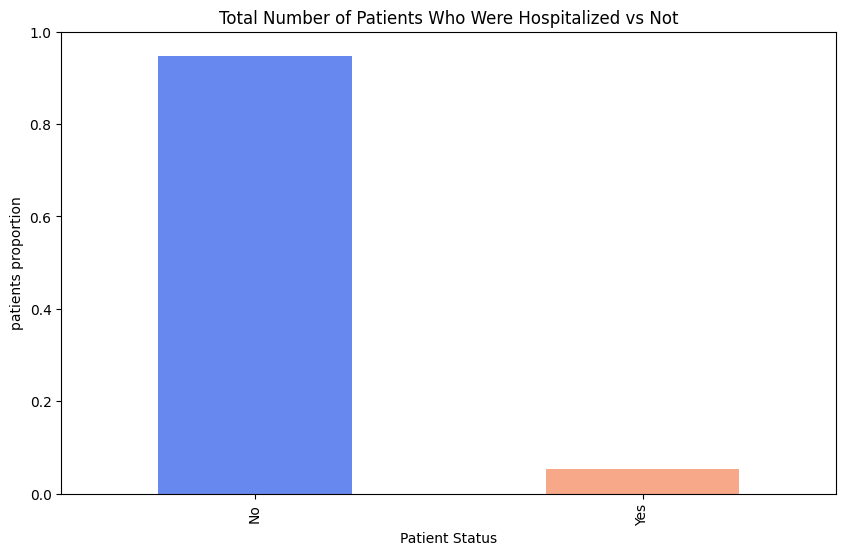

In [ ]:
# Count occurrences of each group
underlying_conditions_counts = exposure2_df['hosp_yn'].value_counts(normalize=True).sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#f7a889']
underlying_conditions_counts.plot(kind='bar', color=colors)

# Set the order of underlying condition values
underlying_condition_order = ['Yes','No']

# Adding labels and title
plt.xlabel('Patient Status')
plt.ylabel('patients proportion')
plt.title('Total Number of Patients Who Were Hospitalized vs Not')
plt.ylim(0,1)

# Show the plot
plt.show()

 **4. Are Asymptomatic COVID patients less likely to be hospitalized? Are they
less likely to die from their illness?**  *Answer: yes, compared to symptomatic COVID patients*

In [ ]:
#Load 3 columns from CSV file which are symptom_status, death_yn and hosp_yn in Asymptomatic_df

Asymptomatic_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=["symptom_status", "death_yn", "hosp_yn"])


In [ ]:
# Drop Null Values that exist in Asymptomatic_df dataframe
Asymptomatic_df=Asymptomatic_df.dropna()

In [ ]:
#Drop Missing values and unknown from Asymptomatic_df
Asymptomatic_df = Asymptomatic_df.drop(Asymptomatic_df[(Asymptomatic_df['symptom_status']=='Missing')].index)
Asymptomatic_df = Asymptomatic_df.drop(Asymptomatic_df[(Asymptomatic_df['symptom_status']=='Unknown')].index)

Asymptomatic_df.head()

,symptom_status,hosp_yn,death_yn
4,Symptomatic,No,No
5,Symptomatic,No,Missing
9,Symptomatic,No,Missing
10,Symptomatic,No,No
12,Symptomatic,No,No


In [ ]:
# Filter Asymptomatic patients who were hospitilazed
hospitilazedAsymptomatic=Asymptomatic_df[(Asymptomatic_df['symptom_status'] =='Asymptomatic') &(Asymptomatic_df['hosp_yn'] =='Yes')]
print(hospitilazedAsymptomatic.shape[0])
# Filter symptomatic patients who were hospitilazed
hospitilazedSymptomatic=Asymptomatic_df[(Asymptomatic_df['symptom_status'] =='Symptomatic') &(Asymptomatic_df['hosp_yn'] =='Yes')]
print(hospitilazedSymptomatic.shape[0])
# Filter Asymptomatic patients who died
diedAsymptomatic=Asymptomatic_df[(Asymptomatic_df['symptom_status'] =='Asymptomatic') &(Asymptomatic_df['death_yn'] =='Yes')]
print(diedAsymptomatic.shape[0])

# Filter symptomatic patients who died
diedSymptomatic=Asymptomatic_df[(Asymptomatic_df['symptom_status'] =='Symptomatic') &(Asymptomatic_df['death_yn'] =='Yes')]
print(diedSymptomatic.shape[0])

7126
318431
834
34238


In [ ]:
hospitilazedAsymptomatic=Asymptomatic_df[(Asymptomatic_df['hosp_yn'] =='Yes')]
hospitilazedAsymptomatic.head()

,symptom_status,hosp_yn,death_yn
109,Symptomatic,Yes,No
113,Symptomatic,Yes,Missing
327,Symptomatic,Yes,No
442,Symptomatic,Yes,Yes
540,Symptomatic,Yes,No


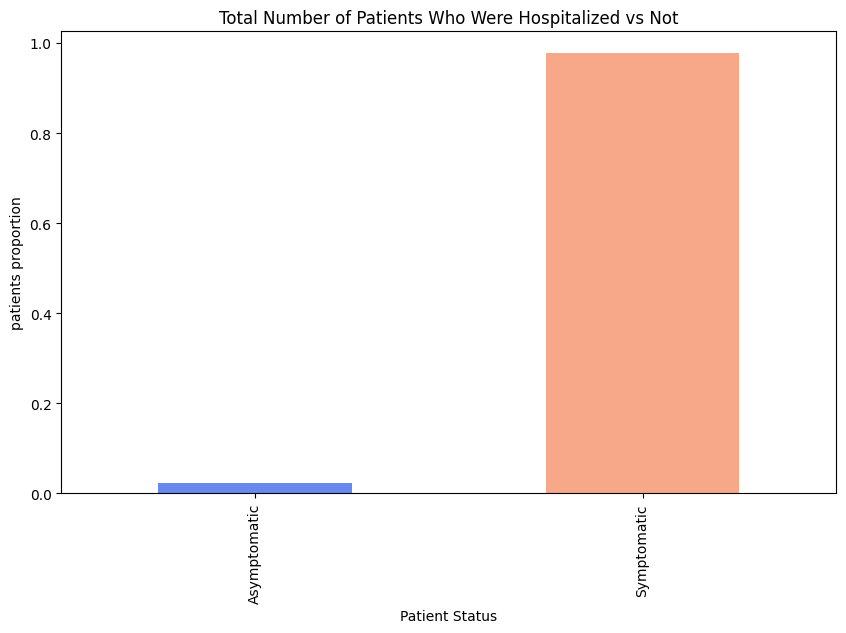

In [ ]:
# Count occurrences of each group
hospitilazedAsymptomatic_counts = hospitilazedAsymptomatic['symptom_status'].value_counts(normalize=True).sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#f7a889']
hospitilazedAsymptomatic_counts.plot(kind='bar', color=colors)



# Adding labels and title
plt.xlabel('Patient Status')
plt.ylabel('patients proportion')
plt.title('Total Number of Patients Who Were Hospitalized vs Not')


# Show the plot
plt.show()

In [ ]:
deadAsymptomatic=Asymptomatic_df[(Asymptomatic_df['death_yn'] =='Yes')]
deadAsymptomatic.head()

,symptom_status,hosp_yn,death_yn
442,Symptomatic,Yes,Yes
859,Symptomatic,Missing,Yes
1973,Symptomatic,Yes,Yes
2787,Symptomatic,Missing,Yes
3708,Symptomatic,No,Yes


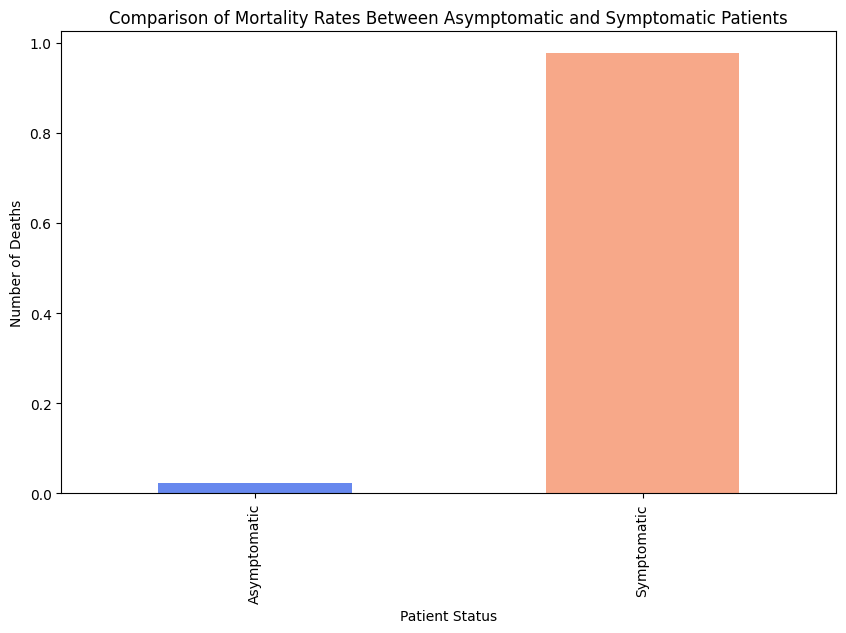

In [ ]:
# Count occurrences of each group
deadAsymptomatic_counts = deadAsymptomatic['symptom_status'].value_counts(normalize=True).sort_index()
# Create a bar chart
plt.figure(figsize=(10, 6))
colors = ['#6788ee', '#f7a889']
deadAsymptomatic_counts.plot(kind='bar', color=colors)



# Adding labels and title
plt.xlabel('Patient Status')
plt.ylabel('Number of Deaths')
plt.title('Comparison of Mortality Rates Between Asymptomatic and Symptomatic Patients')


# Show the plot
plt.show()

**Comment**:
From bar chart, It found that:

1.   Asymptomatic patients are less likely to be hopitilzed than symptomatic patients
2.   Asymptomatic patients are less likely to die than symptomatic patients

 **5. Which state is associated with the highest percentage of Economic Impact
(stimulus) payments among survey respondents?**

In [ ]:
df2_test = pd.read_csv('/content/drive/Shareddrives/team6/pulse_puf_most_recent.csv', usecols=["eip", "est_st"])

In [ ]:
df2_test.eip.unique()
#From Dataset description, We need to drop people those who don't take any stimulus (4), and null values and
#those who seen questions but didn't choose any value (-99)

array([ nan,   1.,   3.,   4.,   2., -99.])

*From dataset description, there are people who take Economic Impact
(stimulus) payments (1,2,3) and there are not (4) so we have to drop 4 and 99 who seen but don't select and null values*

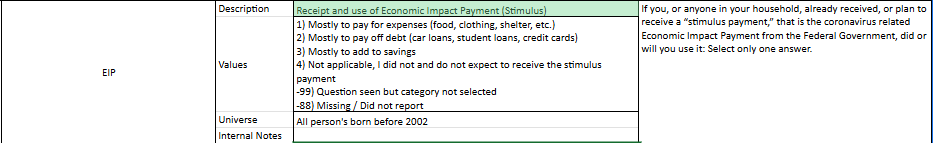


In [ ]:
df2_test=df2_test[(df2_test['eip'] ==1.0 )|(df2_test['eip'] ==2.0)|(df2_test['eip'] ==3.0)]
print(df2_test.shape[0])


449860


In [ ]:
print(df2_test.eip.unique())

[1. 3. 2.]


In [ ]:
# used gropu by function to group stimulus payments per state
frequncyPerEachState = df2_test.sort_values(['eip'],ascending=True).groupby(['est_st']).size()
print(frequncyPerEachState)


est_st
1      7450
2      6255
4     11819
5      7470
6     29789
8      9115
9      6957
10     6532
11     3311
12    19082
13    11216
15     6817
16     7631
17    10010
18     8564
19     7679
20     7759
21     7550
22     7554
23     6072
24     8308
25    10114
26    12396
27     8736
28     6391
29     8321
30     7194
31     7376
32     7774
33     6654
34     7811
35     7375
36     9464
37     8860
38     4256
39     8373
40     7448
41     8922
42    10848
44     6194
45     7721
46     4983
47     8427
48    23630
49     9949
50     4913
51     8770
53    11983
54     5811
55     7537
56     4689
dtype: int64


In [ ]:
print("Max payments:",max(frequncyPerEachState))
print("min payments:",min(frequncyPerEachState))


Max payments: 29789
min payments: 3311


*Comment*:

1.   California is the highest state in payments
2.   Delaware is the lowest state in payments



In [ ]:
state_codes_to_names={ 1  :'Alabama',
                     2  :'Alaska',
                     4  :'Arizona',
                     5  :'Arkansas',
                     6  :'California',
                     8  :'Colorado',
                     9  :'Connecticut',
                     10  :'Delaware',
                     11  :'District of Columbia',
                     12  :'Florida',
                     13  :'Georgia',
                     15  :'Hawaii',
                     16  :'Idaho',
                     17  :'Illinois',
                     18  :'Indiana',
                     19  :'Iowa',
                     20  :'Kansas',
                     21  :'Kentucky',
                     22  :'Louisiana',
                     23  :'Maine',
                     24  :'Maryland',
                     25  :'Massachusetts',
                     26  :'Michigan',
                     27  :'Minnesota',
                     28  :'Mississippi',
                     29  :'Missouri',
                     30  :'Montana',
                     31  :'Nebraska',
                     32  :'Nevada',
                     33  :'New Hampshire',
                     34  :'New Jersey',
                     35  :'New Mexico',
                     36  :'New York',
                     37  :'North Carolina',
                     38  :'North Dakota',
                     39  :'Ohio',
                     40  :'Oklahoma',
                     41  :'Oregon',
                     42  :'Pennsylvania',
                     44  :'Rhode Island',
                     45  :'South Carolina',
                     46  :'South Dakota',
                     47  :'Tennessee',
                     48  :'Texas',
                     49  :'Utah',
                     50  :'Vermont',
                     51  :'Virginia',
                     53  :'Washington',
                     54  :'West Virginia',
                     55  :'Wisconsin',
                     56  :'Wyoming'
                     }

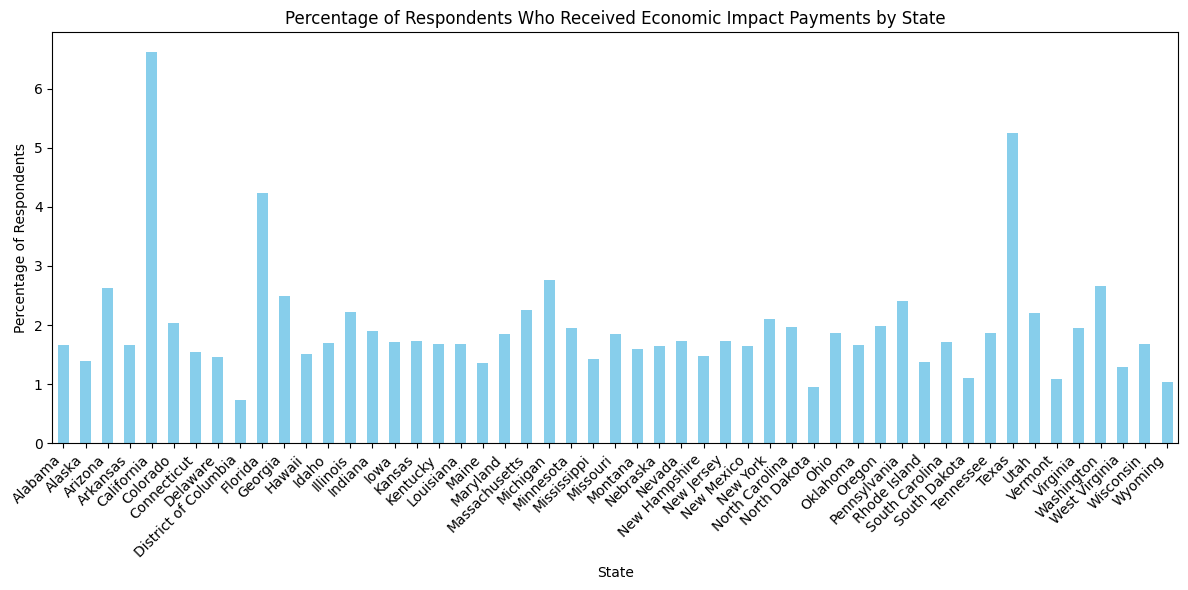

In [ ]:


# Convert state codes to state names
frequncyPerEachState.index = frequncyPerEachState.index.map(state_codes_to_names)

# Calculate percentages
total_respondents = frequncyPerEachState.sum()
percentage_occur = (frequncyPerEachState / total_respondents) * 100

# Plotting
plt.figure(figsize=(12, 6))
percentage_occur.plot(kind='bar', color='skyblue')
plt.title('Percentage of Respondents Who Received Economic Impact Payments by State')
plt.xlabel('State')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 **2.2 Come up with 5 more bivariate/multivariate analysis questions and
similarly answer each with appropriate visuals and commentary.**

**2.2.1. Who are the people (the demographic segment) that appear to be most at risk of entering ICU? Who is the least at risk?**

*Answer*:
*For most risk People*:
1.   Age group: +65 years
2.   Sex: Male
3.   Race: White
*For least at risk*:
1.   Age group: 0-17 years
2.   Sex: Female
3.   Race: Native Hawaiian/Other Pacific Islander



In [ ]:
# Extracting DemographicFeatures (sex, race, age_group)

# Function of "usecols" to reduce cost of memory
DemographicFeatures_ICU_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=["age_group", "sex", "race","icu_yn"])

In [ ]:
# Drop Null Values that exist in DemographicFeatures dataframe
DemographicFeatures_ICU_df=DemographicFeatures_ICU_df.dropna()

In [ ]:
# Make sure that DemographicFeatures dataframe consists of 4 colums (sex, race, age_group and icu_yn)
DemographicFeatures_ICU_df.shape[1]

4

In [ ]:
# Printing Unique Values in ICU column to drop Missing and Unknown Values.

print("Unique Values that exists in death_yn Column:",DemographicFeatures_ICU_df.icu_yn.unique())

Unique Values that exists in death_yn Column: ['Missing' 'Unknown' 'No' 'Yes']


In [ ]:
# Extract age group from DemographicFeatures dataframe

# make a copy form DemographicFeatures_ICU_df
age_group=DemographicFeatures_ICU_df
# Filter ICU column --> 'Yes'
# Drop Missing Values that exist in age group column
age_group = age_group.drop(age_group[(age_group['age_group']=='Missing')].index)

age_group=age_group[['age_group', 'icu_yn']].where(age_group.icu_yn == "Yes")

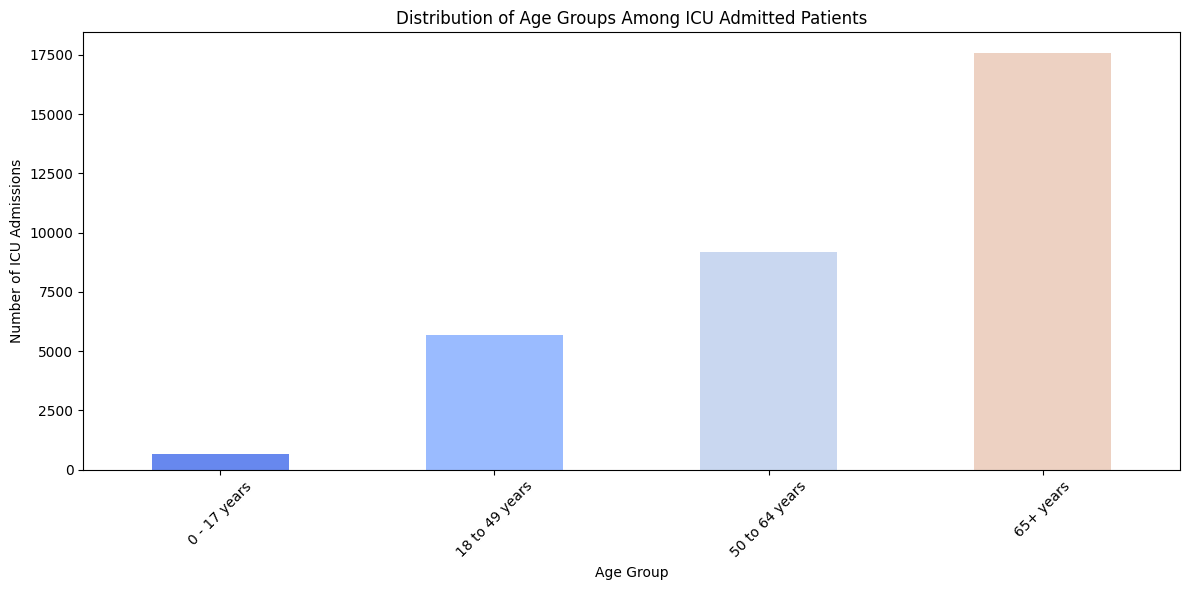

In [ ]:

# Count occurrences of each age group
age_group_counts = age_group['age_group'].value_counts().sort_index()

# Define a list of beautiful colors for the bars
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']

# Create a bar chart with beautiful colors
plt.figure(figsize=(12, 6))
age_group_counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of ICU Admissions')
plt.title('Distribution of Age Groups Among ICU Admitted Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping of labels

# Show the plot with beautiful colors
plt.show()


In [ ]:
# Extract sex from DemographicFeatures dataframe

# make a copy form DemographicFeatures_ICU_df
sex=DemographicFeatures_ICU_df
# Filter ICU column --> 'Yes'
# Drop Missing and Unknown Values that exist in sex column
sex = sex.drop(sex[(sex['sex']=='Unknown') |(sex['sex']=='Missing')].index)

sex=sex[['sex', 'icu_yn']].where(sex.icu_yn == "Yes")
sex.value_counts().to_frame('counts')

,,counts
sex,icu_yn,
Male,Yes,19188
Female,Yes,13840


<Figure size 1200x600 with 0 Axes>

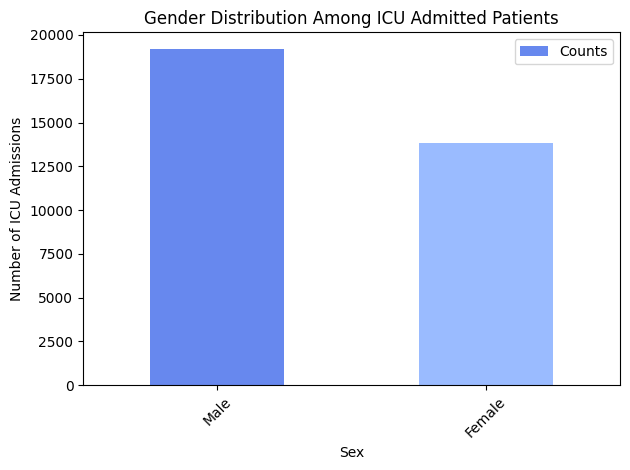

In [ ]:

# Count occurrences of each sex
sex_distribution = sex['sex'].value_counts().to_frame('counts').reset_index()

# Rename the index column to 'Sex'
sex_distribution.columns = ['Sex', 'Counts']

# Define a list of beautiful colors for the bars
colors = ['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']  # Example colors, adjust as needed

# Create a bar chart with beautiful colors
plt.figure(figsize=(12, 6))
sex_distribution.plot(kind='bar', x='Sex', y='Counts', color=colors)

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Number of ICU Admissions')
plt.title('Gender Distribution Among ICU Admitted Patients')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping of labels

plt.show()


In [ ]:
# Extract race from DemographicFeatures dataframe

# make a copy form DemographicFeatures_ICU_df
race=DemographicFeatures_ICU_df
# Filter death column --> 'Yes'
# Drop Unknown and Missing Values that exist in sex column
race = race.drop(race[(race['race']=='Unknown') |(race['race']=='Missing')].index)

race=race[['race', 'icu_yn']].where(race.icu_yn == "Yes")

# Calculate the value counts and convert them to a DataFrame
race_counts = race['race'].value_counts(normalize=True).reset_index()
race_counts.columns = ['race', 'counts']


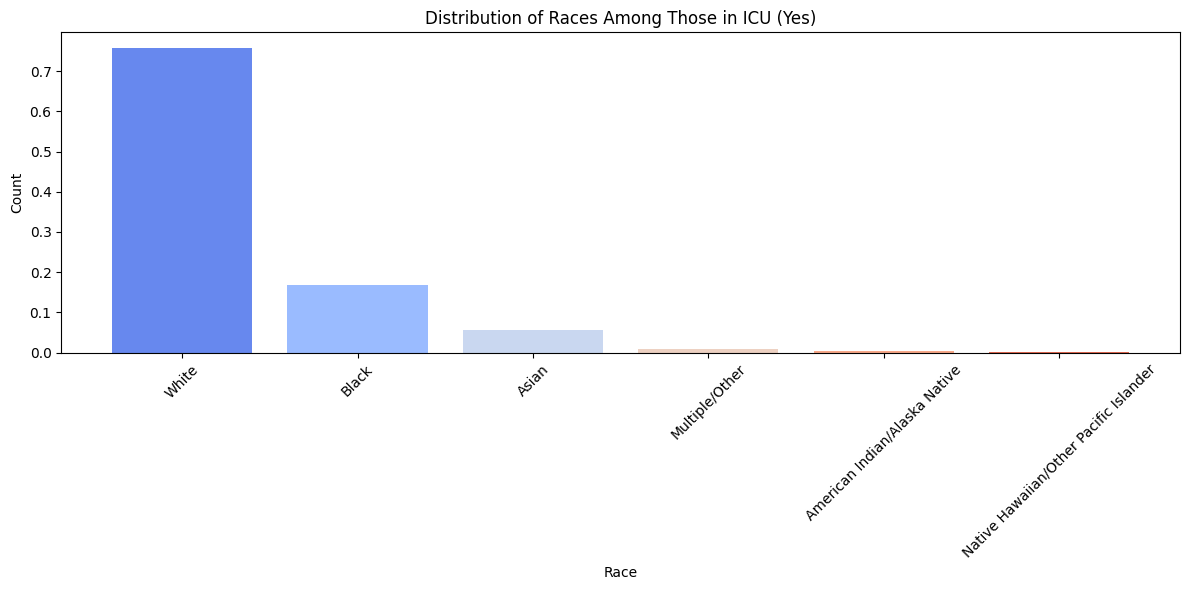

In [ ]:
# Plotting the bar chart
colors=['#6788ee', '#9abbff', '#c9d7f0', '#edd1c2', '#f7a889', '#e26952']
plt.figure(figsize=(12, 6))
plt.bar(race_counts['race'], race_counts['counts'], color=colors)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Races Among Those in ICU (Yes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**2.2.2. Are patients without underlying medical conditions are less likely to enter ICU?**  *Answer*: *Yes, Compared with patients who have underlying medical conditions.*

In [ ]:
#Load 2 columns from CSV file which are underlying_conditions_yn and icu_yn in medical_icu_df

medical_icu_df = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=["underlying_conditions_yn", "icu_yn"])


In [ ]:
# Filter patients with underlying medical conditions who entered ICU
withMedicalICU=medical_icu_df[(medical_icu_df['underlying_conditions_yn'] =='Yes') &(medical_icu_df['icu_yn'] =='Yes')]
print(withMedicalICU.shape[0])
# Filter patients without underlying medical conditions who entered ICU
withoutMedicalICU=medical_icu_df[(medical_icu_df['underlying_conditions_yn'] =='No') &(medical_icu_df['icu_yn'] =='Yes')]
print(withoutMedicalICU.shape[0])
normalizationFactor=withoutMedicalICU.shape[0]+withMedicalICU.shape[0]

16248
62


In [ ]:
MedicalICU=medical_icu_df[medical_icu_df['icu_yn'] =='Yes']


In [ ]:
underlying_conditions_counts = MedicalICU['underlying_conditions_yn'].value_counts(normalize=True).sort_index()
print(underlying_conditions_counts)

underlying_conditions_yn
No     0.003801
Yes    0.996199
Name: proportion, dtype: float64


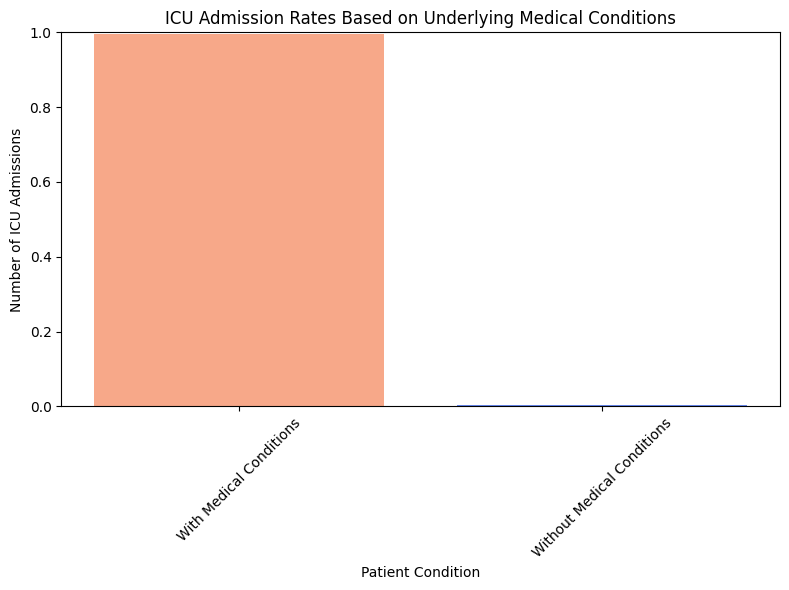

In [ ]:

# Prepare data for plotting
conditions = ['With Medical Conditions', 'Without Medical Conditions']
icu_admissions = [(withMedicalICU.shape[0]/normalizationFactor), (withoutMedicalICU.shape[0]/normalizationFactor)]

colors = ['#f7a889', '#6788ee']
underlying_condition_order = ['Yes','No']
plt.figure(figsize=(8, 6))
plt.bar(conditions, icu_admissions, color=colors)

# Adding labels and title
plt.xlabel('Patient Condition')
plt.ylabel('Number of ICU Admissions')
plt.title('ICU Admission Rates Based on Underlying Medical Conditions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.ylim(0,1)

plt.show()


**2.2.3. How does internet availability at home impact the likelihood of children receiving remote education during the pandemic?**

<ipython-input-27-a80d10d98bd8>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='intrntavail', y='tschlhrs', data=internet_school_hours, palette='coolwarm')


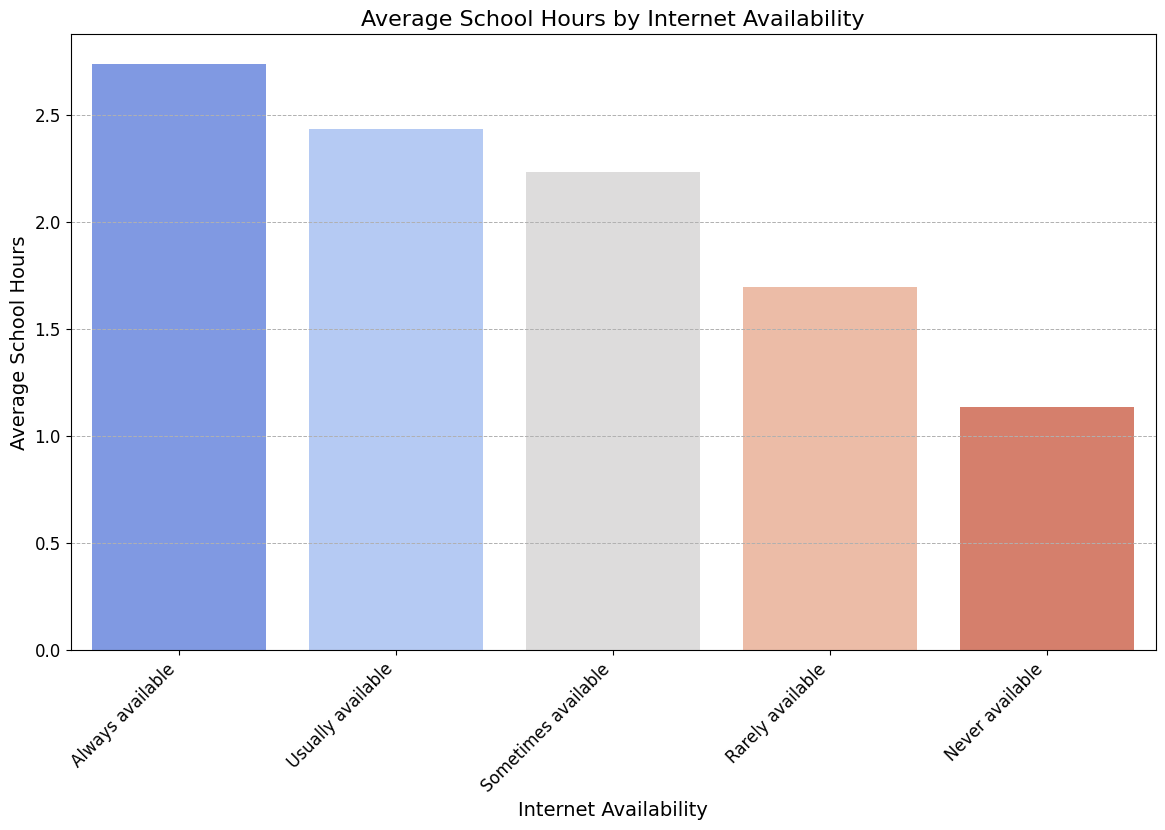

In [ ]:
# intrntavail' (internet availability) and 'tschlhrs' (total school hours)
internet_mapping = {
    1: 'Always available',
    2: 'Usually available',
    3: 'Sometimes available',
    4: 'Rarely available',
    5: 'Never available'
}

# Apply the mapping
df2['intrntavail'] = df2['intrntavail'].replace(internet_mapping)

# Remove invalid values for both 'intrntavail' and 'tschlhrs'
df2_filtered = df2[(df2['intrntavail'].isin(internet_mapping.values())) & (~df2['tschlhrs'].isin([-99, -88]))]

# Group data by internet availability and calculate the average school hours
internet_school_hours = df2_filtered.groupby('intrntavail')['tschlhrs'].mean().reset_index()

# Sort the dataframe by 'tschlhrs'
internet_school_hours = internet_school_hours.sort_values(by='tschlhrs', ascending=False)

# Improved bar plot for average school hours by internet availability
plt.figure(figsize=(14, 8))
sns.barplot(x='intrntavail', y='tschlhrs', data=internet_school_hours, palette='coolwarm')
plt.title('Average School Hours by Internet Availability', fontsize=16)
plt.xlabel('Internet Availability', fontsize=14)
plt.ylabel('Average School Hours', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


**2.2.4 What is the proportion of COVID-19 cases that result in ICU admissions over time for different age groups?**   
*Answer*:


*For Age Group 18 to 49 years*:


1.   Highest rate month: Feb-2020
2.   Lowest rate month: Oct-2022



*For Age Group 50 to 64 years*:


1.   Highest rate month: Feb-2020
2.   Lowest rate month: Mar-2023


*For Age Group +65 years*:


1.   Highest rate month: Feb-2020
2.   Lowest rate month: Apr-2023



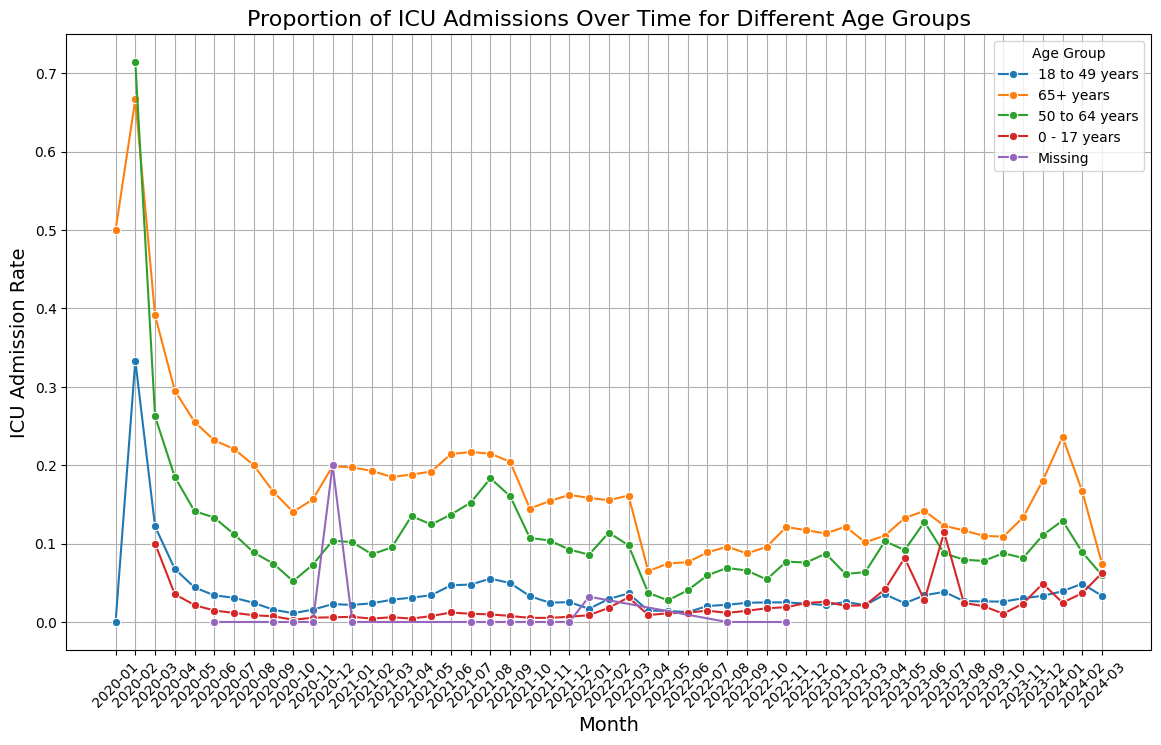

In [ ]:

covid_data_filtered = pd.read_csv("/content/drive/Shareddrives/team6/data.csv", usecols=['case_month', 'age_group', 'icu_yn'])

# Clean the data
covid_data_filtered = covid_data_filtered.dropna(subset=['case_month', 'age_group', 'icu_yn'])
covid_data_filtered = covid_data_filtered[covid_data_filtered['icu_yn'].isin(['Yes', 'No'])]

# Calculate the proportion of ICU admissions over time for different age groups
icu_proportion = covid_data_filtered.groupby(['case_month', 'age_group'])['icu_yn'].value_counts(normalize=True).unstack().fillna(0)
icu_proportion = icu_proportion.rename(columns={'Yes': 'ICU Admission Rate', 'No': 'Non-ICU Rate'}).reset_index()

# Plot the proportion of ICU admissions over time for different age groups
plt.figure(figsize=(14, 8))
sns.lineplot(data=icu_proportion, x='case_month', y='ICU Admission Rate', hue='age_group', marker='o')
plt.title('Proportion of ICU Admissions Over Time for Different Age Groups', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('ICU Admission Rate', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.grid(True)
plt.show()

**2.2.5. Question: What is the relationship between anxiety, worry, and average school hours?**  

*Answer*:*Anxiety level increase as long as average school hours increases*


<ipython-input-6-259ea3b478e0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anxiety_school_hours, x='anxious', y='tschlhrs', palette='coolwarm')


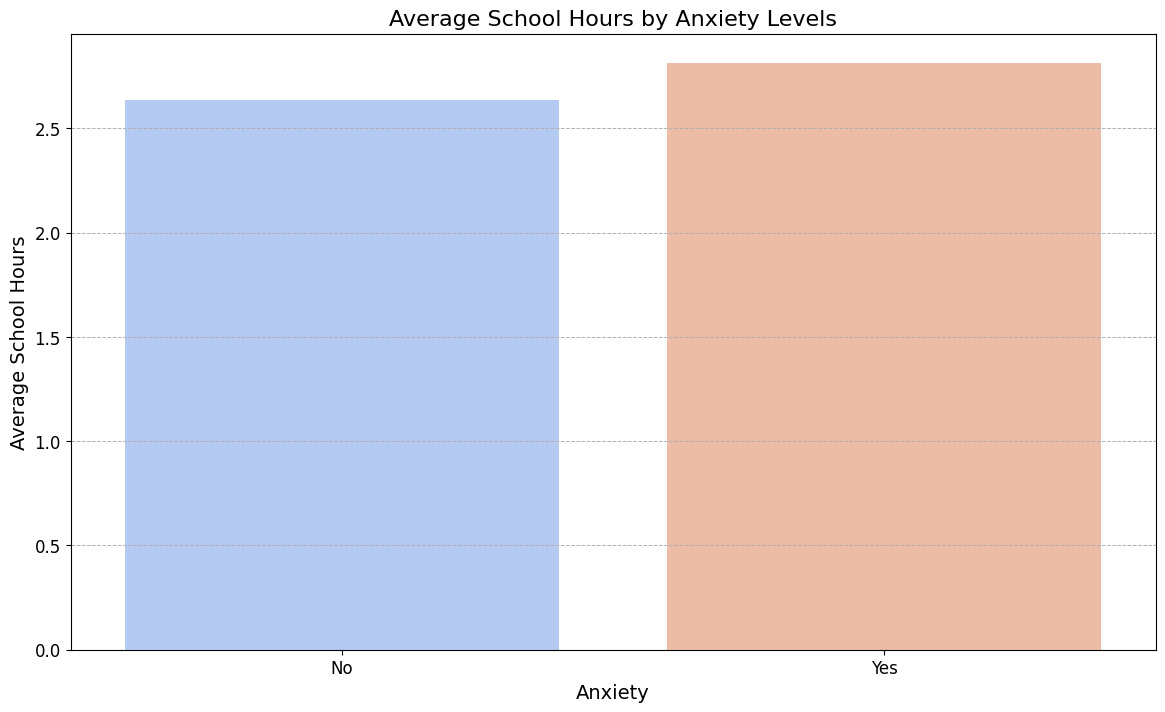

<ipython-input-6-259ea3b478e0>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=worry_school_hours, x='worry', y='tschlhrs', palette='coolwarm')


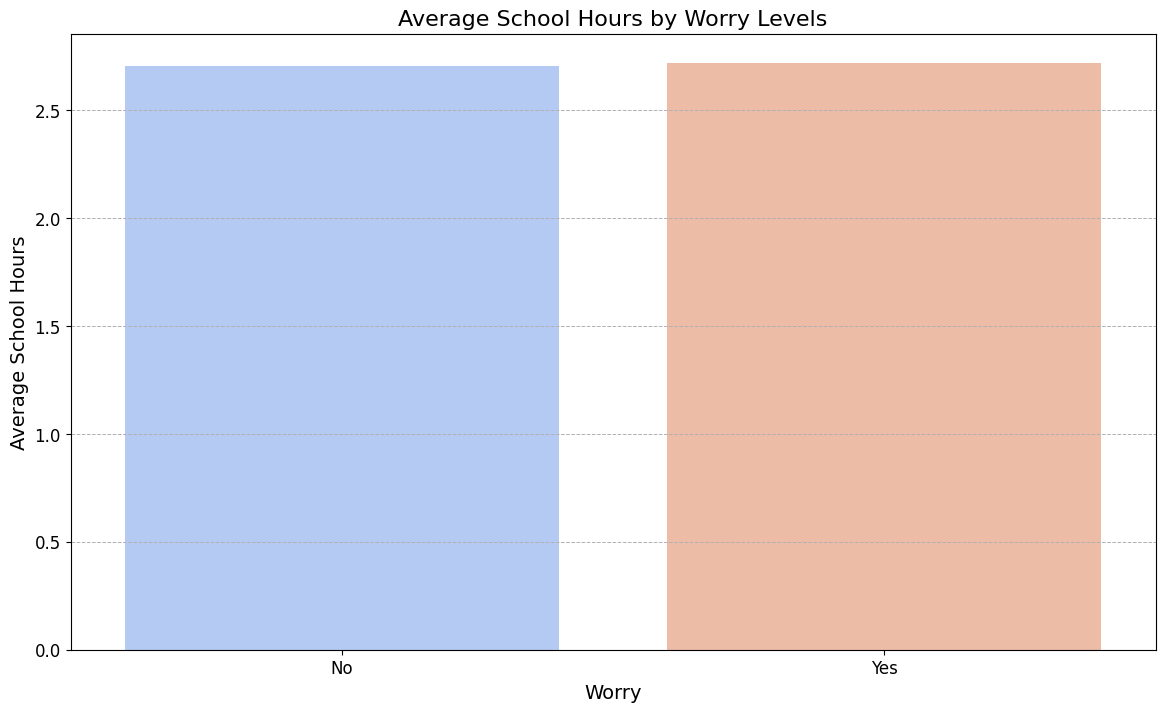

In [ ]:
pulse_data_filtered = pd.read_csv('/content/drive/Shareddrives/team6/pulse_puf_most_recent.csv', usecols=['anxious', 'worry', 'tschlhrs'])


# Define the mapping for anxiety and worry
anxiety_mapping = {
    1: 'Yes',
    2: 'No'
}

worry_mapping = {
    1: 'Yes',
    2: 'No'
}

# Apply the mappings
pulse_data_filtered['anxious'] = pulse_data_filtered['anxious'].replace(anxiety_mapping)
pulse_data_filtered['worry'] = pulse_data_filtered['worry'].replace(worry_mapping)

# Clean the data by removing invalid values
pulse_data_filtered = pulse_data_filtered[pulse_data_filtered['anxious'].isin(anxiety_mapping.values())]
pulse_data_filtered = pulse_data_filtered[pulse_data_filtered['worry'].isin(worry_mapping.values())]
pulse_data_filtered = pulse_data_filtered[~pulse_data_filtered['tschlhrs'].isin([-99, -88])]

# Calculate the average school hours based on anxiety levels
anxiety_school_hours = pulse_data_filtered.groupby('anxious')['tschlhrs'].mean().reset_index()

# Calculate the average school hours based on worry levels
worry_school_hours = pulse_data_filtered.groupby('worry')['tschlhrs'].mean().reset_index()

# Plot the average school hours based on anxiety levels
plt.figure(figsize=(14, 8))
sns.barplot(data=anxiety_school_hours, x='anxious', y='tschlhrs', palette='coolwarm')
plt.title('Average School Hours by Anxiety Levels', fontsize=16)
plt.xlabel('Anxiety', fontsize=14)
plt.ylabel('Average School Hours', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

# Plot the average school hours based on worry levels
plt.figure(figsize=(14, 8))
sns.barplot(data=worry_school_hours, x='worry', y='tschlhrs', palette='coolwarm')
plt.title('Average School Hours by Worry Levels', fontsize=16)
plt.xlabel('Worry', fontsize=14)
plt.ylabel('Average School Hours', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()